In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense



In [2]:
# Load training set
train_df = pd.read_csv('/content/Google_Stock_Price_Train.csv')

# Extract 'Open' prices and reshape
training_set = train_df[['Open']].values


In [3]:
# Normalize values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = scaler.fit_transform(training_set)


In [4]:
X_train = []
y_train = []

for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])  # 60 previous values
    y_train.append(training_set_scaled[i, 0])       # target value

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape for RNN input: [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [5]:
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.fit(X_train, y_train, epochs=20, batch_size=32)


Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1430
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0015
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0016
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0010
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.7012e-04
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9.5799e-04
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.8565e-04
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.7026e-04
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.6451e-04
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.7359e-04
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.7874e-04
Epoch 15/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1

In [7]:
# Load test set
test_df = pd.read_csv('/content/Google_Stock_Price_Test.csv')
real_stock_price = test_df[['Open']].values

# Combine train and test for continuity
full_data = pd.concat((train_df['Open'], test_df['Open']), axis=0)
inputs = full_data[len(full_data) - len(test_df) - 60:].values.reshape(-1, 1)
inputs_scaled = scaler.transform(inputs)

# Create test sequences
X_test = []
for i in range(60, 60 + len(test_df)):
    X_test.append(inputs_scaled[i-60:i, 0])

X_test = np.array(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [8]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


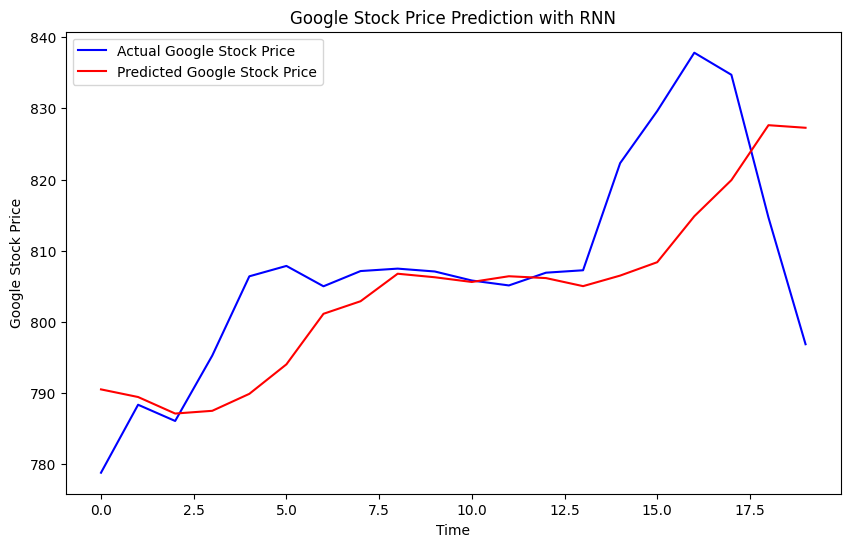

In [9]:
plt.figure(figsize=(10,6))
plt.plot(real_stock_price, color='blue', label='Actual Google Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction with RNN')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
